In [1]:
from keras.datasets import mnist,fashion_mnist
from keras.utils import to_categorical
from keras import datasets
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


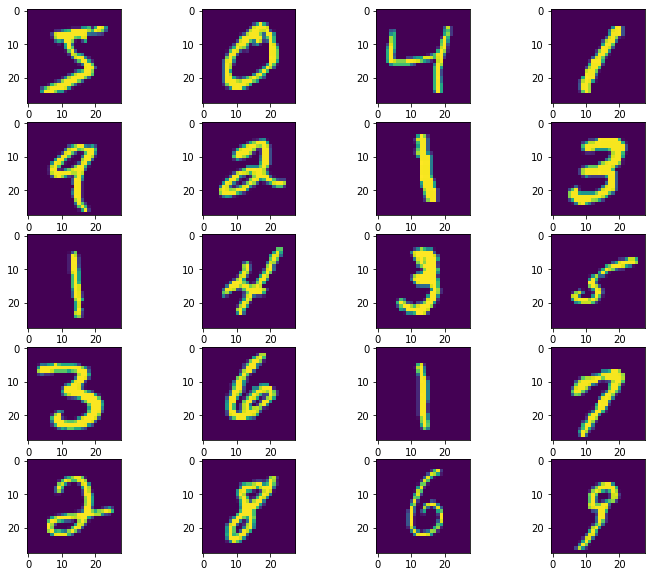

In [2]:
# load the data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# display a few images
plt.figure( figsize=(12,10))
plt.axis('off')
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i])
 

In [3]:
# reshape the x_train and x_test data
 
x_train = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test = np.reshape(x_test, (x_test.shape[0], 28*28))


#one hot encoding (data types and list)
y_train = to_categorical(y_train)
y_test_cats = y_train # keep copy to use later
y_test = to_categorical(y_test)

 

In [7]:
# build a 3 layer neural network (80, 40, 10)
# discuss classes, activations, loss functions, optimizers, metrics

model = Sequential()
model.add(Dense(80, input_shape=(784,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 80)                62800     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
Total params: 65,540
Trainable params: 65,540
Non-trainable params: 0
_________________________________________________________________


In [8]:
# fit the model, show the progression of training 
# (batch_size, epochs, validation )
model.fit(x_train,y_train, validation_split=0.1, epochs=10)
 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 51us/step - loss: 1.8769 - acc: 0.5324 - val_loss: 0.8778 - val_acc: 0.7128
Epoch 2/10
54000/54000 [==============================] - 3s 50us/step - loss: 0.6892 - acc: 0.7949 - val_loss: 0.4366 - val_acc: 0.8768
Epoch 3/10
54000/54000 [==============================] - 3s 50us/step - loss: 0.4204 - acc: 0.8923 - val_loss: 0.3185 - val_acc: 0.9125
Epoch 4/10
54000/54000 [==============================] - 3s 53us/step - loss: 0.2700 - acc: 0.9318 - val_loss: 0.1901 - val_acc: 0.9547
Epoch 5/10
54000/54000 [==============================] - 3s 50us/step - loss: 0.2066 - acc: 0.9463 - val_loss: 0.1789 - val_acc: 0.9572
Epoch 6/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.1715 - acc: 0.9549 - val_loss: 0.1460 - val_acc: 0.9602
Epoch 7/10
54000/54000 [==============================] - 3s 51us/step - loss: 0.1492 - acc: 0.9596 - val_loss: 0.1914 - val_acc:

In [9]:
# evaluate the model with test data
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 25us/step


[0.17016383290067316, 0.9581000208854675]

In [10]:
# compare ground truth to predictions  using test data
y_hat = model.predict(x_test)

In [19]:
# confusion matrix
# use argmax to tally counts of y_test and y_hat (conf_y, conf_y_hat)
y_cats = np.argmax(y_hat, axis=1)
y_test_cats = np.argmax(y_test, axis=1)
confusion_matrix(y_test_cats, y_cats) 

array([[ 974,    0,    2,    0,    0,    1,    2,    0,    1,    0],
       [   0, 1115,    4,    2,    0,    1,    2,    1,   10,    0],
       [   8,    1,  992,    3,    0,    0,    9,    5,   14,    0],
       [   0,    0,   11,  972,    0,   15,    0,    3,    8,    1],
       [   2,    1,    0,    0,  911,    0,   16,    0,    8,   44],
       [   5,    0,    0,   17,    2,  841,   14,    3,    7,    3],
       [  12,    3,    0,    0,    1,    7,  933,    0,    1,    1],
       [   1,    2,   13,    3,    0,    0,    1,  995,    4,    9],
       [  19,    0,   11,   24,    4,    4,    8,    3,  899,    2],
       [   8,    4,    0,   16,    7,    6,    3,    7,    9,  949]])